In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

with open('arxiv_data.json', 'r') as f:
    data = json.load(f)


# 構建 DataFrame
df = pd.DataFrame({
    'title': data['titles'],
    'abstract': data['summaries'],
    'labels': data['terms']
})

# 查看 DataFrame 結構
print(df.head())

                                               title  \
0  Survey on Semantic Stereo Matching / Semantic ...   
1  FUTURE-AI: Guiding Principles and Consensus Re...   
2  Enforcing Mutual Consistency of Hard Regions f...   
3  Parameter Decoupling Strategy for Semi-supervi...   
4  Background-Foreground Segmentation for Interio...   

                                            abstract                 labels  
0  Stereo matching is one of the widely used tech...         [cs.CV, cs.LG]  
1  The recent advancements in artificial intellig...  [cs.CV, cs.AI, cs.LG]  
2  In this paper, we proposed a novel mutual cons...         [cs.CV, cs.AI]  
3  Consistency training has proven to be an advan...                [cs.CV]  
4  To ensure safety in automated driving, the cor...         [cs.CV, cs.LG]  


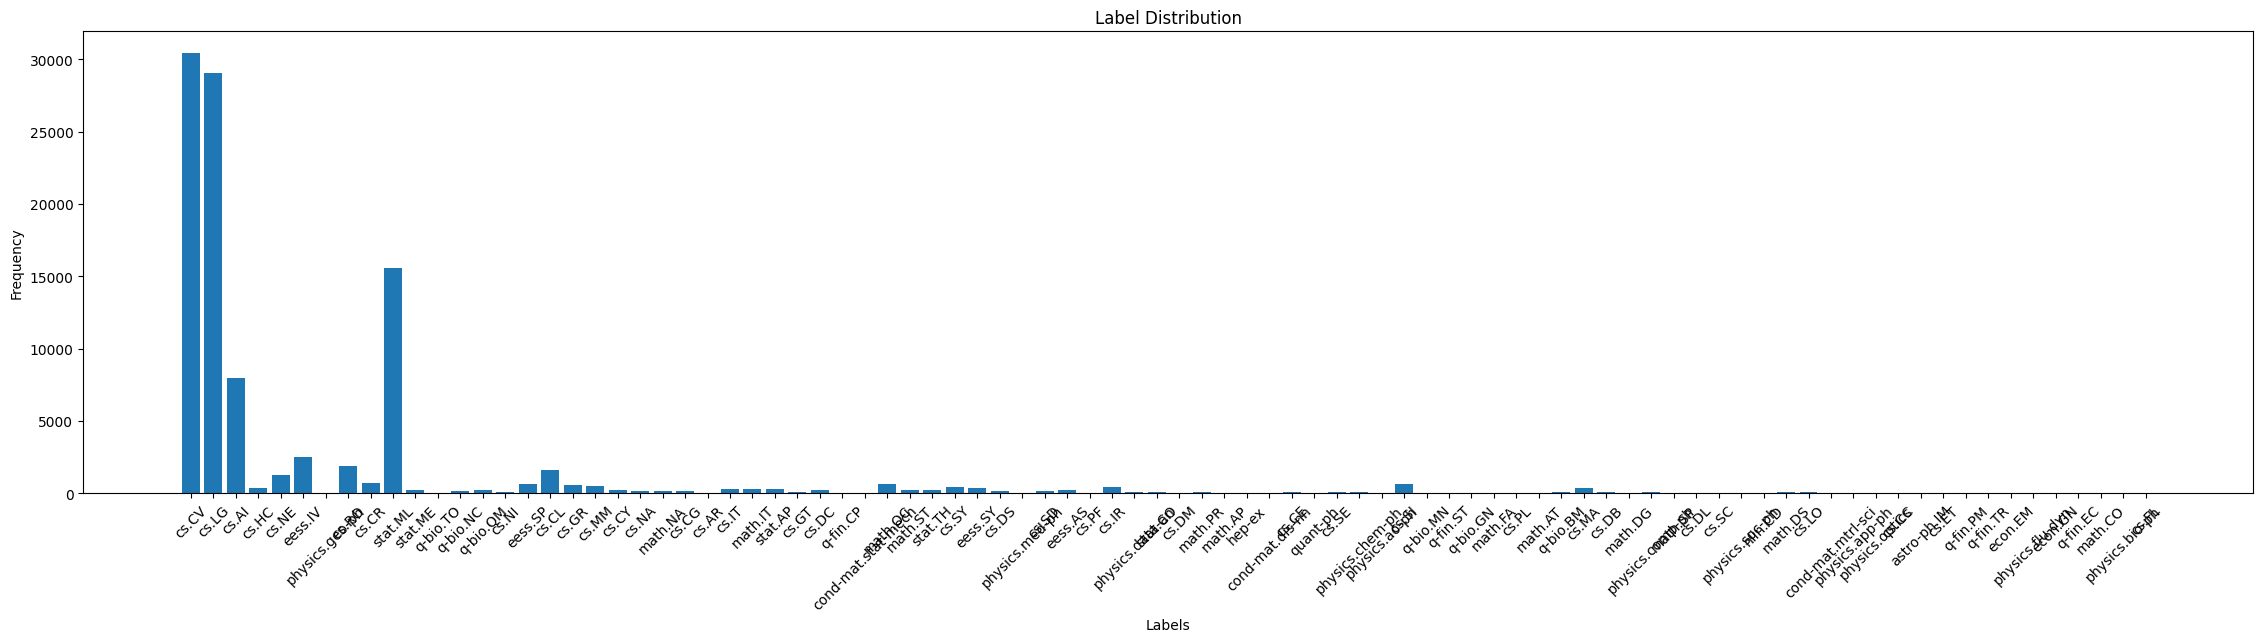

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# 展開 labels 欄位
all_labels = [label for labels in df['labels'] for label in labels]
label_counts = Counter(all_labels)

# 可視化標籤分佈
plt.figure(figsize=(28, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


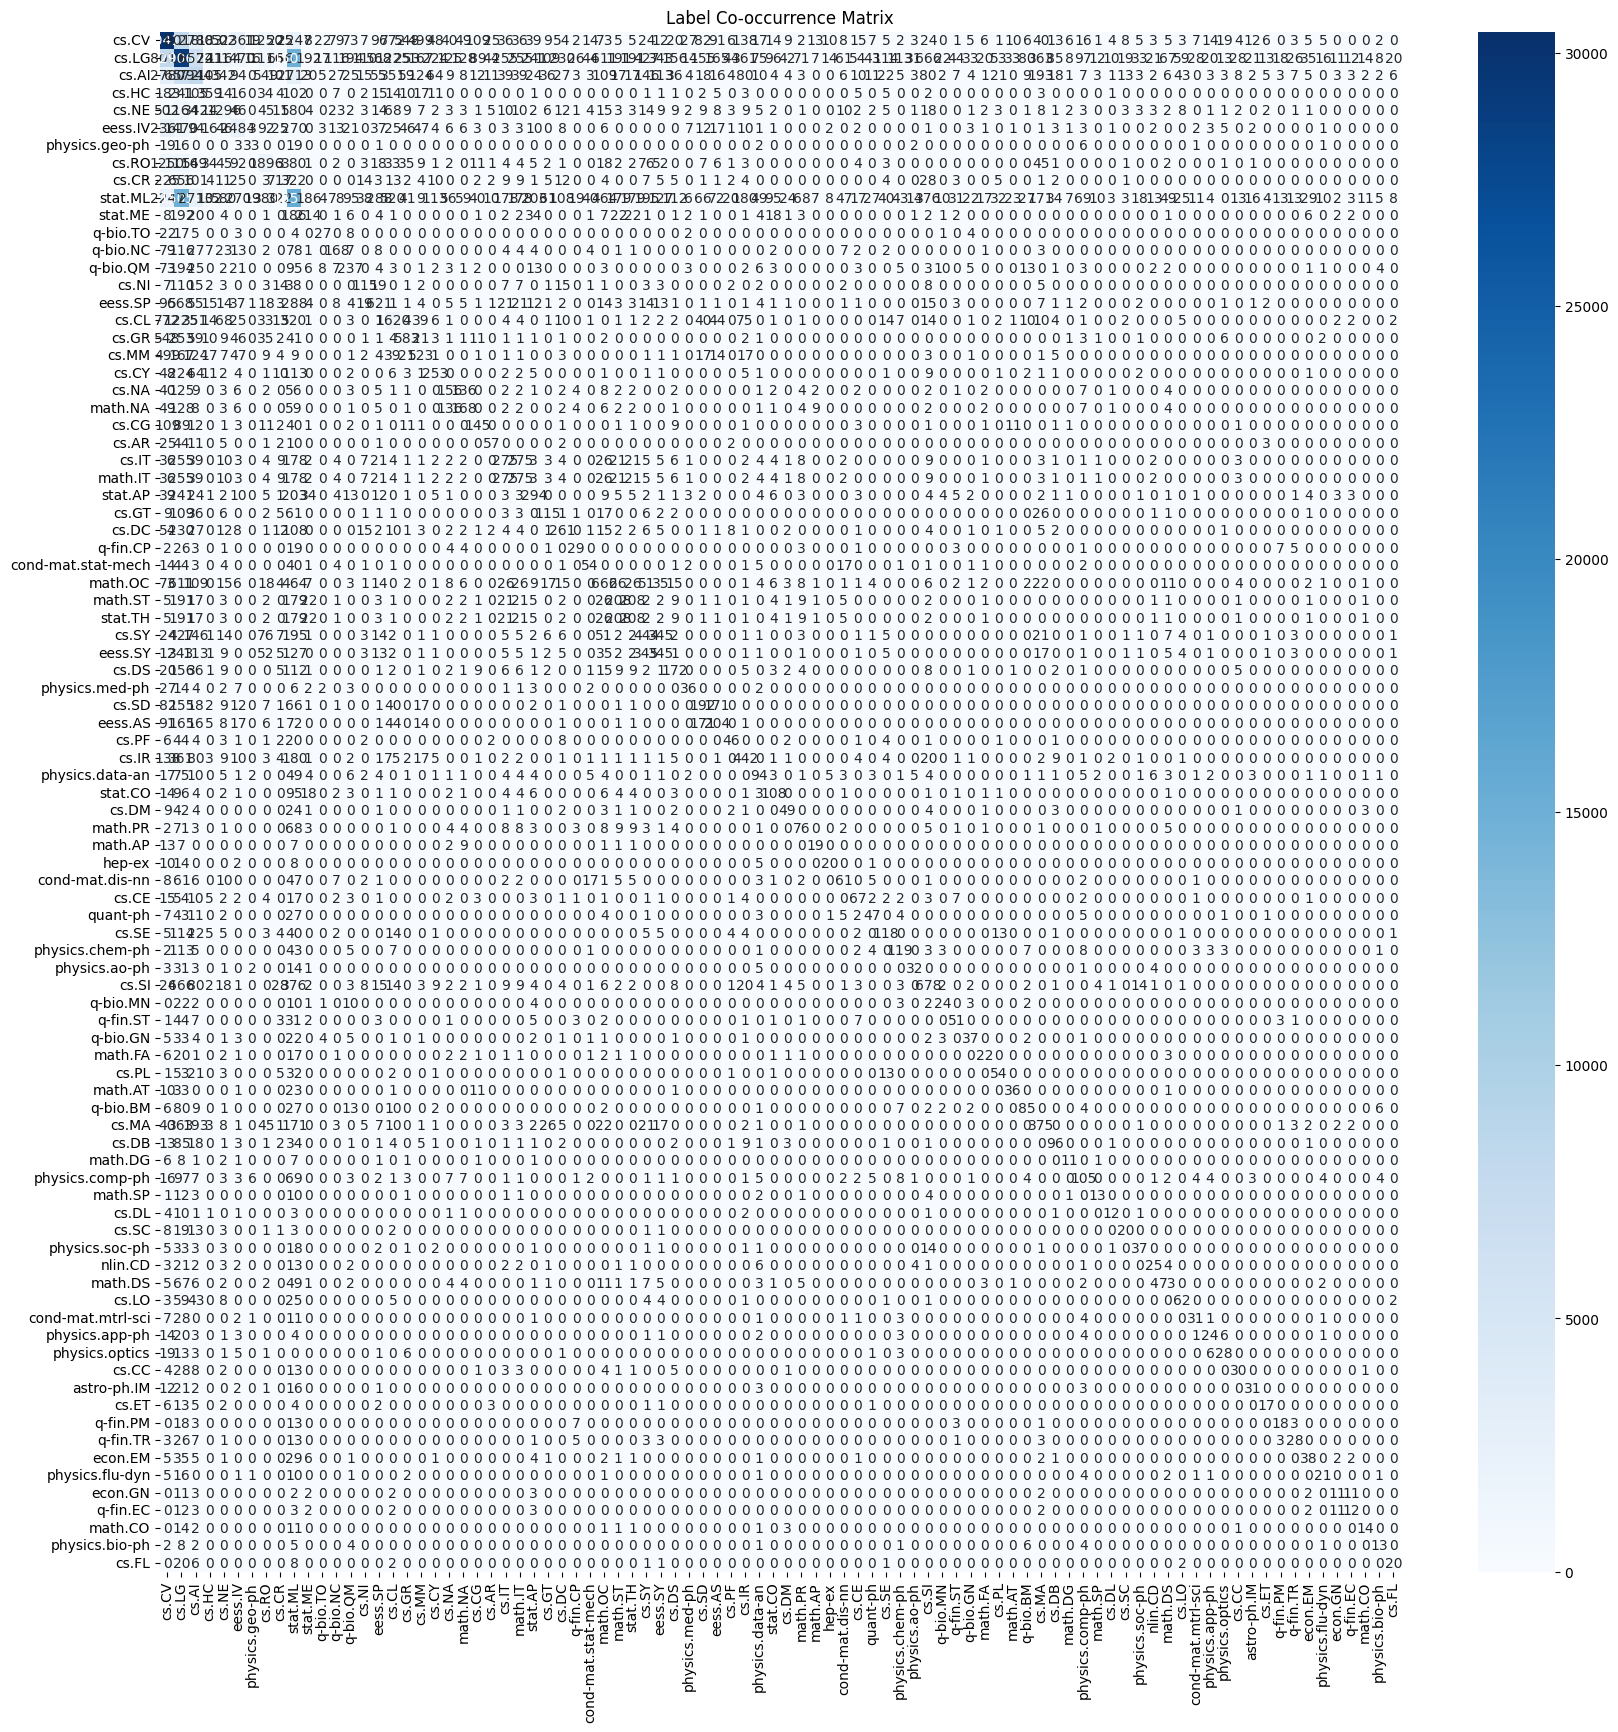

In [10]:
import pandas as pd
import seaborn as sns

# 計算標籤共現次數
label_combinations = df['labels'].apply(lambda x: frozenset(x))
co_occurrence_counts = Counter(label_combinations)

# 創建共現矩陣
label_matrix = pd.DataFrame(0, index=label_counts.keys(), columns=label_counts.keys())

for labels in co_occurrence_counts:
    for label1 in labels:
        for label2 in labels:
            label_matrix.loc[label1, label2] += co_occurrence_counts[labels]

# 可視化共現矩陣
plt.figure(figsize=(20,20))
sns.heatmap(label_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Label Co-occurrence Matrix")
plt.show()


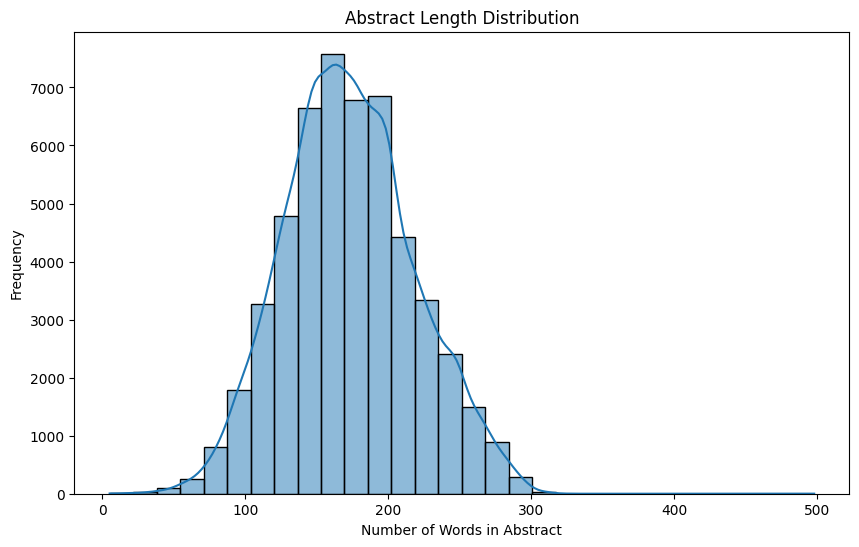

In [8]:
# 計算每篇摘要的字數
abstract_lengths = df['abstract'].apply(lambda x: len(x.split()))

# 可視化字數分佈
plt.figure(figsize=(10, 6))
sns.histplot(abstract_lengths, bins=30, kde=True)
plt.title("Abstract Length Distribution")
plt.xlabel("Number of Words in Abstract")
plt.ylabel("Frequency")
plt.show()


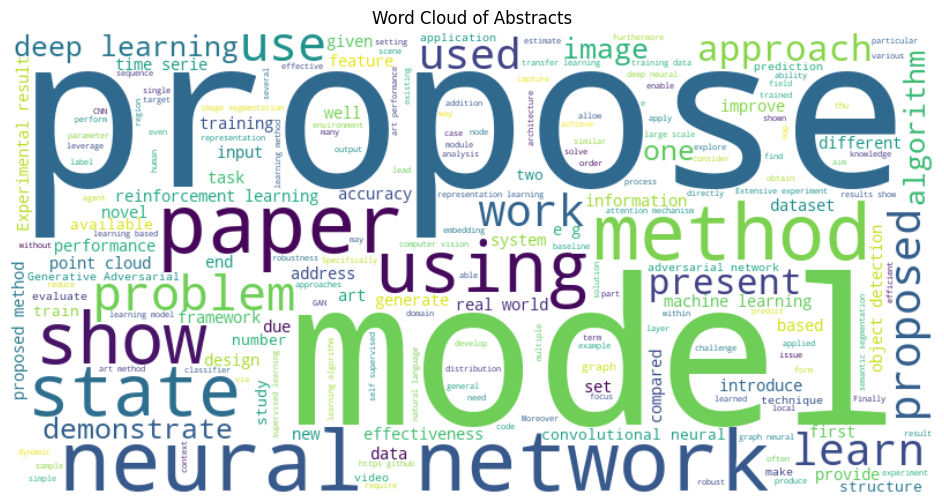

In [9]:
from wordcloud import WordCloud

# 將摘要文字合併
text = " ".join(df['abstract'].values)

# 生成詞雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 顯示詞雲
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Abstracts")
plt.show()
